In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramazanfratakda","key":"ed1566cc15f2c7491d66fcf38a8f266b"}'}

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Zor veri Seti

In [ ]:
!kaggle datasets download -d hamzaboulahia/hardfakevsrealfaces
!unzip hardfakevsrealfaces.zip

Dataset URL: https://www.kaggle.com/datasets/hamzaboulahia/hardfakevsrealfaces
License(s): CC0-1.0
 72% 11.0M/15.3M [00:00<00:00, 17.5MB/s]
100% 15.3M/15.3M [00:01<00:00, 15.8MB/s]
Archive:  hardfakevsrealfaces.zip
  inflating: data.csv                
  inflating: fake/fake_1.jpg         
  inflating: fake/fake_10.jpg        
  inflating: fake/fake_100.jpg       
  inflating: fake/fake_101.jpg       
  inflating: fake/fake_102.jpg       
  inflating: fake/fake_103.jpg       
  inflating: fake/fake_104.jpg       
  inflating: fake/fake_105.jpg       
  inflating: fake/fake_106.jpg       
  inflating: fake/fake_107.jpg       
  inflating: fake/fake_108.jpg       
  inflating: fake/fake_109.jpg       
  inflating: fake/fake_11.jpg        
  inflating: fake/fake_110.jpg       
  inflating: fake/fake_111.jpg       
  inflating: fake/fake_112.jpg       
  inflating: fake/fake_113.jpg       
  inflating: fake/fake_114.jpg       
  inflating: fake/fake_115.jpg       
  inflating: fake/fake_11

Kolay Veri Seti

In [ ]:
!kaggle datasets download -d undersc0re/fake-vs-real-face-classification
!unzip fake-vs-real-face-classification.zip

Dataset URL: https://www.kaggle.com/datasets/undersc0re/fake-vs-real-face-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100% 215M/215M [00:07<00:00, 29.1MB/s]
100% 215M/215M [00:07<00:00, 29.3MB/s]
Archive:  fake-vs-real-face-classification.zip
  inflating: Validation/fake/532.jpg  
  inflating: Validation/fake/533.jpg  
  inflating: Validation/fake/534.jpg  
  inflating: Validation/fake/535.jpg  
  inflating: Validation/fake/536.jpg  
  inflating: Validation/fake/537.jpg  
  inflating: Validation/fake/538.jpg  
  inflating: Validation/fake/539.jpg  
  inflating: Validation/fake/540.jpg  
  inflating: Validation/fake/541.jpg  
  inflating: Validation/fake/542.jpg  
  inflating: Validation/fake/543.jpg  
  inflating: Validation/fake/544.jpg  
  inflating: Validation/fake/545.jpg  
  inflating: Validation/fake/546.jpg  
  inflating: Validation/fake/547.jpg  
  inflating: Validation/fake/548.jpg  
  inflating: Validation/fake/549.jpg  
  inflating: Validation/fake/5

# Kütüphaneleri içe aktarma

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from glob import glob

from tensorflow import keras
from keras import layers
from keras.models import Sequential

kolay veri setinden real ve fakeleri çıkarma

In [ ]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

easy_train_path = "/content/train"
easy_val_path = "/content/Validation"


easy_real_images = load_images_from_folder(os.path.join(easy_train_path,"real"))
easy_real_images += load_images_from_folder(os.path.join(easy_val_path,"real"))


easy_fake_images = load_images_from_folder(os.path.join(easy_train_path,"fake"))
easy_fake_images += load_images_from_folder(os.path.join(easy_val_path,"fake"))




In [ ]:
print(len(easy_real_images))
print(len(easy_fake_images))

949
760


zor olan veri setinden real ve fakeleri alma



In [ ]:
hard_real_path = './real'
hard_fake_path = './fake'

hard_real_images = load_images_from_folder(hard_real_path)
hard_fake_images = load_images_from_folder(hard_fake_path)



In [ ]:
print(len(hard_real_images))
print(len(hard_fake_images))

589
700


# Resimleri Birleştirme

In [ ]:
all_real_images = easy_real_images + hard_real_images
all_fake_images = easy_fake_images + hard_fake_images


In [ ]:
print(len(all_real_images))
print(len(all_fake_images))

1538
1460


# Resimleri Önişleme

In [ ]:
def preprocess_images(images):
  preprocessed_images = []
  for image in images:
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image/255.0
    preprocessed_images.append(image)
  return preprocessed_images

real_im_processed = preprocess_images(all_real_images)
fake_im_processed = preprocess_images(all_fake_images)

In [ ]:
real_labels = [1] * len(real_im_processed)
fake_labels = [0] * len(fake_im_processed)

# Tüm görüntüleri ve etiketleri
all_images = np.concatenate((real_im_processed, fake_im_processed), axis=0)
all_labels = real_labels + fake_labels

all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [ ]:
for i in range(10):
  plt.imshow(all_images[i])
  plt.show()

# Verileri Train Test ve Validation olarak ayırma

In [ ]:
from sklearn.model_selection import train_test_split

# train ve test
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# train ve validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# MODEL OLUŞTURMA

Mobilenet v3 small

In [ ]:
mobilenet_small = keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",
    classes=2,
    pooling="avg",
    classifier_activation="sigmoid",
)

mobilenet_small.trainable = False

4334752/4334752 [==============================] - 1s 0us/step


In [ ]:
small_model = keras.Sequential()
small_model.add(mobilenet_small)
small_model.add(keras.layers.Flatten())
small_model.add(keras.layers.Dropout(0.5))
small_model.add(keras.layers.Dense(1, activation="sigmoid"))


small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 576)               939120    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 1)                 577       
                                                                 
Total params: 939697 (3.58 MB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.0001)
small_model.compile(loss="binary_crossentropy", optimizer=optim, metrics=["accuracy"])



small_history = small_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val),
)

test_loss, test_acc = small_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Epoch 1/50
60/60 [==============================] - 8s 72ms/step - loss: 0.7197 - accuracy: 0.5068 - val_loss: 0.6950 - val_accuracy: 0.4979
Epoch 2/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7175 - accuracy: 0.5052 - val_loss: 0.6939 - val_accuracy: 0.4958
Epoch 3/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7165 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.4958
Epoch 4/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7198 - accuracy: 0.4901 - val_loss: 0.6937 - val_accuracy: 0.4958
Epoch 5/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7171 - accuracy: 0.4885 - val_loss: 0.6936 - val_accuracy: 0.4875
Epoch 6/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7189 - accuracy: 0.4964 - val_loss: 0.6936 - val_accuracy: 0.4958
Epoch 7/50
60/60 [==============================] - 2s 26ms/step - loss: 0.7169 - accuracy: 0.4870 - val_loss: 0.6936 - val_accuracy: 0.4979
Epoch 8/50
60

19/19 [==============================] - 0s 24ms/step - loss: 0.6903 - accuracy: 0.5350
Test Loss: 0.6902897953987122
Test Accuracy: 0.5350000262260437
19/19 [==============================] - 1s 21ms/step


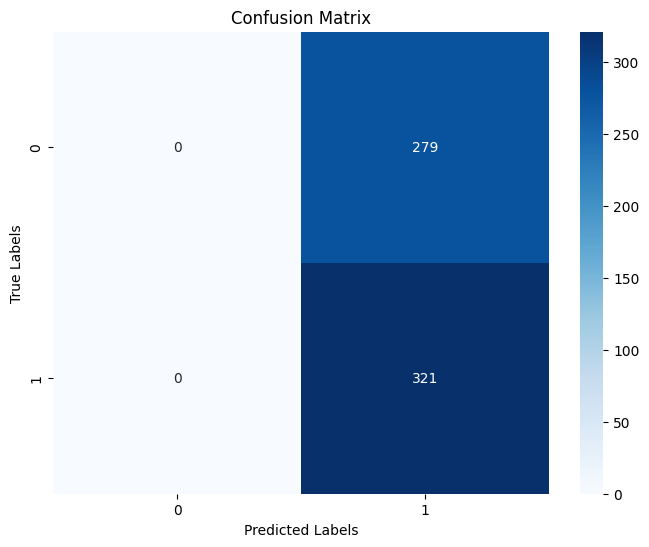

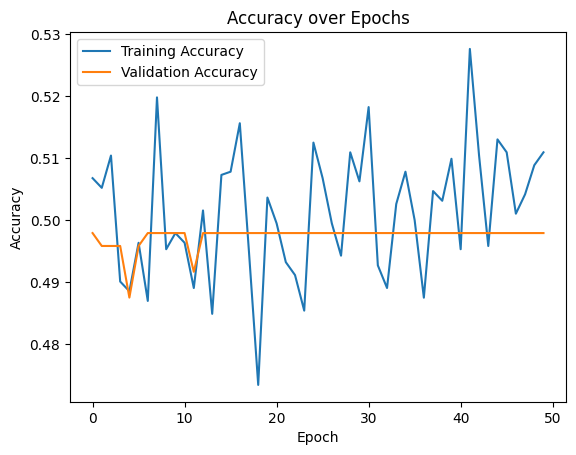

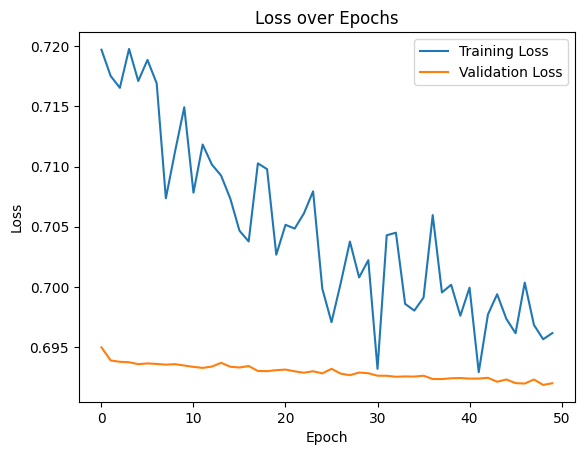

In [ ]:
test_loss, test_accuracy = small_model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = small_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(small_history.history['accuracy'], label='Training Accuracy')
plt.plot(small_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(small_history.history['loss'], label='Training Loss')
plt.plot(small_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

shufflenet

In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import backend as K
#from keras.applications.imagenet_utils import _obtain_input_shape
from keras_applications.imagenet_utils import _obtain_input_shape
#from tensorflow.keras.models import Model


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras.layers import Activation, Add, Concatenate, GlobalAveragePooling2D,GlobalMaxPooling2D, Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Lambda

from tensorflow.keras.utils import get_file
from tensorflow.keras.layers import DepthwiseConv2D
import numpy as np
import numpy as np

from tensorflow.python.keras import backend as K

from tensorflow.python.util import nest
from tensorflow.python.util.tf_export import keras_export

def get_source_inputs(tensor, layer=None, node_index=None):

  if not hasattr(tensor, '_keras_history'):
    return tensor

  if layer is None or node_index:
    layer, node_index, _ = tensor._keras_history
  if not layer._inbound_nodes:
    return [tensor]
  else:
    node = layer._inbound_nodes[node_index]
    if not node.inbound_layers:
      # Reached an Input layer, stop recursion.
      return nest.flatten(node.input_tensors)
    else:
      source_tensors = []
      for layer, node_index, _, tensor in node.iterate_inbound():
        previous_sources = get_source_inputs(tensor, layer, node_index)
        # Avoid input redundancy.
        for x in previous_sources:
          if x not in source_tensors:
            source_tensors.append(x)
      return source_tensors

def ShuffleNet(include_top=True, input_tensor=None, scale_factor=1.0, pooling='max',weights = None,
               input_shape=(224,224,3), groups=1, load_model=None, num_shuffle_units=[3, 7, 3],
               bottleneck_ratio=0.25, classes=1000):

    if K.backend() != 'tensorflow':
        raise RuntimeError('Only TensorFlow backend is currently supported, '
                           'as other backends do not support ')

    name = "ShuffleNet_%.2gX_g%d_br_%.2g_%s" % (scale_factor, groups, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))

    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)


    out_dim_stage_two = {1: 144, 2: 200, 3: 240, 4: 272, 8: 384}
    if groups not in out_dim_stage_two:
        raise ValueError("Invalid number of groups.")

    if pooling not in ['max','avg']:
        raise ValueError("Invalid value for pooling.")

    if not (float(scale_factor) * 4).is_integer():
        raise ValueError("Invalid value for scale_factor. Should be x over 4.")

    exp = np.insert(np.arange(0, len(num_shuffle_units), dtype=np.float32), 0, 0)
    out_channels_in_stage = 2 ** exp
    out_channels_in_stage *= out_dim_stage_two[groups]  # calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same',
               use_bias=False, strides=(2, 2), activation="relu", name="conv1")(img_input)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name="maxpool1")(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(0, len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = _block(x, out_channels_in_stage, repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   groups=groups, stage=stage + 2)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name="global_pool")(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name="global_pool")(x)

    if include_top:
        x = Dense(units=classes, name="fc")(x)
        x = Activation('softmax', name='softmax')(x)


    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs=inputs, outputs=x, name=name)

    if load_model is not None:
        model.load_weights('', by_name=True)

    return model


def _block(x, channel_map, bottleneck_ratio, repeat=1, groups=1, stage=1):

    x = _shuffle_unit(x, in_channels=channel_map[stage - 2],
                      out_channels=channel_map[stage - 1], strides=2,
                      groups=groups, bottleneck_ratio=bottleneck_ratio,
                      stage=stage, block=1)

    for i in range(1, repeat + 1):
        x = _shuffle_unit(x, in_channels=channel_map[stage - 1],
                          out_channels=channel_map[stage - 1], strides=1,
                          groups=groups, bottleneck_ratio=bottleneck_ratio,
                          stage=stage, block=(i + 1))

    return x


def _shuffle_unit(inputs, in_channels, out_channels, groups, bottleneck_ratio, strides=2, stage=1, block=1):

    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        bn_axis = 1

    prefix = 'stage%d/block%d' % (stage, block)

    #if strides >= 2:
        #out_channels -= in_channels

    # default: 1/4 of the output channel of a ShuffleNet Unit
    bottleneck_channels = int(out_channels * bottleneck_ratio)
    groups = (1 if stage == 2 and block == 1 else groups)

    x = _group_conv(inputs, in_channels, out_channels=bottleneck_channels,
                    groups=(1 if stage == 2 and block == 1 else groups),
                    name='%s/1x1_gconv_1' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_1' % prefix)(x)
    x = Activation('relu', name='%s/relu_gconv_1' % prefix)(x)

    x = Lambda(channel_shuffle, arguments={'groups': groups}, name='%s/channel_shuffle' % prefix)(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), padding="same", use_bias=False,
                        strides=strides, name='%s/1x1_dwconv_1' % prefix)(x)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_dwconv_1' % prefix)(x)

    x = _group_conv(x, bottleneck_channels, out_channels=out_channels if strides == 1 else out_channels - in_channels,
                    groups=groups, name='%s/1x1_gconv_2' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_2' % prefix)(x)

    if strides < 2:
        ret = Add(name='%s/add' % prefix)([x, inputs])
    else:
        avg = AveragePooling2D(pool_size=3, strides=2, padding='same', name='%s/avg_pool' % prefix)(inputs)
        ret = Concatenate(bn_axis, name='%s/concat' % prefix)([x, avg])

    ret = Activation('relu', name='%s/relu_out' % prefix)(ret)

    return ret


def _group_conv(x, in_channels, out_channels, groups, kernel=1, stride=1, name=''):

    if groups == 1:
        return Conv2D(filters=out_channels, kernel_size=kernel, padding='same',
                      use_bias=False, strides=stride, name=name)(x)

    # number of intput channels per group
    ig = in_channels // groups
    group_list = []

    assert out_channels % groups == 0

    for i in range(groups):
        offset = i * ig
        group = Lambda(lambda z: z[:, :, :, offset: offset + ig], name='%s/g%d_slice' % (name, i))(x)
        group_list.append(Conv2D(int(0.5 + out_channels / groups), kernel_size=kernel, strides=stride,
                                 use_bias=False, padding='same', name='%s_/g%d' % (name, i))(group))
    return Concatenate(name='%s/concat' % name)(group_list)


def channel_shuffle(x, groups):

    height, width, in_channels = x.shape.as_list()[1:]
    channels_per_group = in_channels // groups

    x = K.reshape(x, [-1, height, width, groups, channels_per_group])
    x = K.permute_dimensions(x, (0, 1, 2, 4, 3))  # transpose
    x = K.reshape(x, [-1, height, width, in_channels])

    return x


In [ ]:
shufflenet_model = ShuffleNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


shufflenet_model.summary()

Model: "ShuffleNet_1X_g1_br_0.25_373"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 24)         648       ['input_2[0][0]']             
                                                                                                  
 maxpool1 (MaxPooling2D)     (None, 56, 56, 24)           0         ['conv1[0][0]']               
                                                                                                  
 stage2/block1/1x1_gconv_1   (None, 56, 56, 36)           864       ['maxpool1[0][0]']            
 (Conv2D)                                                              

In [ ]:
shuffle_model = keras.models.Sequential()
shuffle_model.add(shufflenet_model)  # Shufflenet modeli
shuffle_model.add(keras.layers.Flatten())  # Flatten katmanı
shuffle_model.add(keras.layers.Dense(256, activation='relu'))
shuffle_model.add(keras.layers.Dropout(0.3))
shuffle_model.add(keras.layers.Dense(1, activation='sigmoid'))  # Çıkış katmanı

In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.0001)
shuffle_model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])


shuffle_history = shuffle_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

test_loss, test_accuracy = shuffle_model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
60/60 [==============================] - 30s 105ms/step - loss: 1.4256 - accuracy: 0.5459 - val_loss: 0.6935 - val_accuracy: 0.5021
Epoch 2/50
60/60 [==============================] - 3s 55ms/step - loss: 0.9053 - accuracy: 0.5970 - val_loss: 0.6933 - val_accuracy: 0.5021
Epoch 3/50
60/60 [==============================] - 3s 55ms/step - loss: 0.6942 - accuracy: 0.6376 - val_loss: 0.6939 - val_accuracy: 0.5021
Epoch 4/50
60/60 [==============================] - 3s 55ms/step - loss: 0.6108 - accuracy: 0.6642 - val_loss: 0.6955 - val_accuracy: 0.5021
Epoch 5/50
60/60 [==============================] - 3s 55ms/step - loss: 0.5810 - accuracy: 0.6992 - val_loss: 0.7052 - val_accuracy: 0.5021
Epoch 6/50
60/60 [==============================] - 3s 55ms/step - loss: 0.5000 - accuracy: 0.7503 - val_loss: 0.7114 - val_accuracy: 0.5021
Epoch 7/50
60/60 [==============================] - 3s 54ms/step - loss: 0.4667 - accuracy: 0.7732 - val_loss: 0.6918 - val_accuracy: 0.5583
Epoch 8/50


19/19 [==============================] - 0s 21ms/step - loss: 2.8197 - accuracy: 0.6033
Test Loss: 2.8196897506713867
Test Accuracy: 0.6033333539962769
19/19 [==============================] - 1s 19ms/step


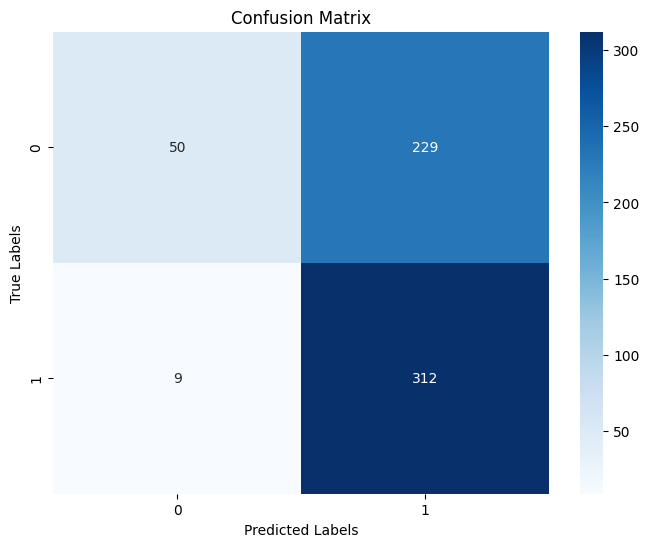

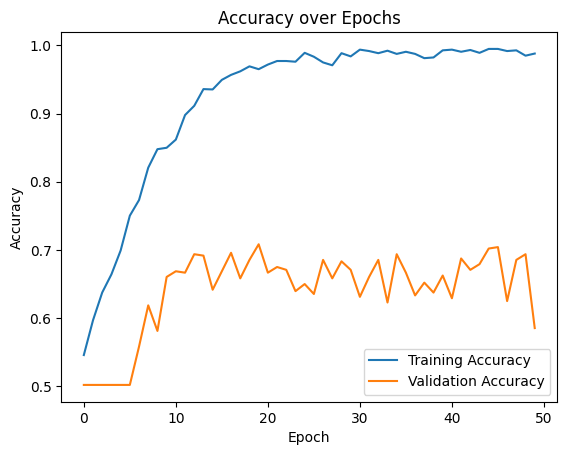

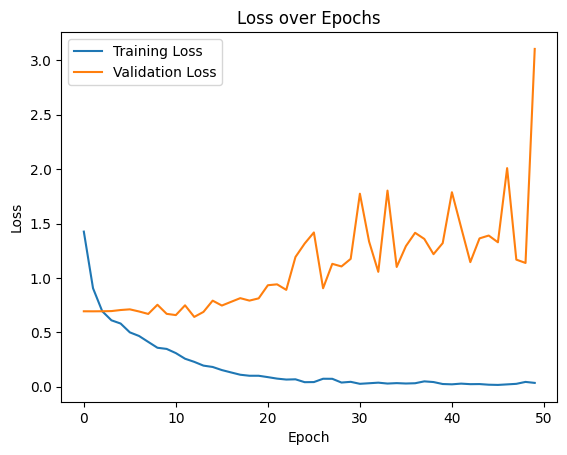

In [ ]:
test_loss, test_accuracy = shuffle_model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = shuffle_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(shuffle_history.history['accuracy'], label='Training Accuracy')
plt.plot(shuffle_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(shuffle_history.history['loss'], label='Training Loss')
plt.plot(shuffle_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

Vgg16

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',
)

vgg16.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model = keras.models.Sequential()
vgg_model.add(vgg16)

vgg_model.add(keras.layers.Flatten())  # Flatten katmanı
vgg_model.add(keras.layers.Dense(256, activation='relu'))
vgg_model.add(keras.layers.Dropout(0,6))
vgg_model.add(keras.layers.Dense(1, activation='sigmoid'))

vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14846273 (56.63 MB)
Trainable params: 131585 (514.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

vgg_history = vgg_model.fit(X_train,y_train, batch_size=32, epochs=50, validation_data=[X_val,y_val], shuffle=True)

test_loss, test_accuracy = vgg_model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
60/60 [==============================] - 23s 269ms/step - loss: 0.6964 - accuracy: 0.5203 - val_loss: 0.6709 - val_accuracy: 0.5521
Epoch 2/50
60/60 [==============================] - 9s 153ms/step - loss: 0.6500 - accuracy: 0.6971 - val_loss: 0.6324 - val_accuracy: 0.6875
Epoch 3/50
60/60 [==============================] - 9s 153ms/step - loss: 0.6201 - accuracy: 0.7122 - val_loss: 0.6062 - val_accuracy: 0.7271
Epoch 4/50
60/60 [==============================] - 9s 153ms/step - loss: 0.5955 - accuracy: 0.7294 - val_loss: 0.5825 - val_accuracy: 0.7354
Epoch 5/50
60/60 [==============================] - 9s 153ms/step - loss: 0.5778 - accuracy: 0.7372 - val_loss: 0.5673 - val_accuracy: 0.7437
Epoch 6/50
60/60 [==============================] - 9s 156ms/step - loss: 0.5602 - accuracy: 0.7419 - val_loss: 0.5596 - val_accuracy: 0.7167
Epoch 7/50
60/60 [==============================] - 9s 157ms/step - loss: 0.5495 - accuracy: 0.7393 - val_loss: 0.5452 - val_accuracy: 0.7375
Epoch

19/19 [==============================] - 3s 138ms/step - loss: 0.4600 - accuracy: 0.7717
Test Loss: 0.4600421190261841
Test Accuracy: 0.7716666460037231
19/19 [==============================] - 3s 138ms/step


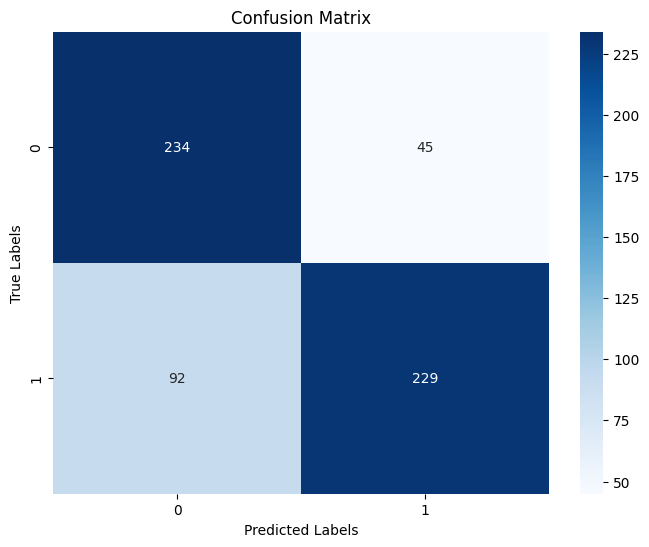

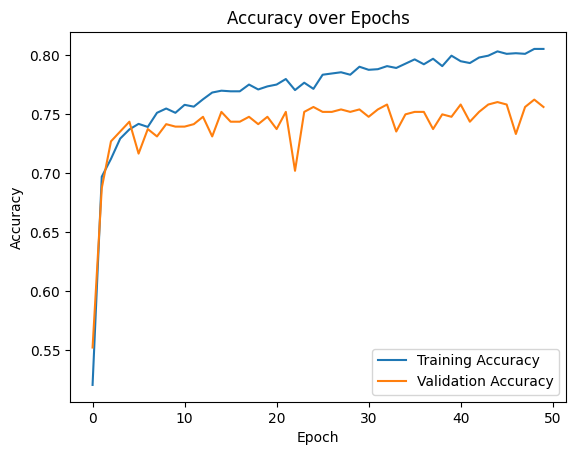

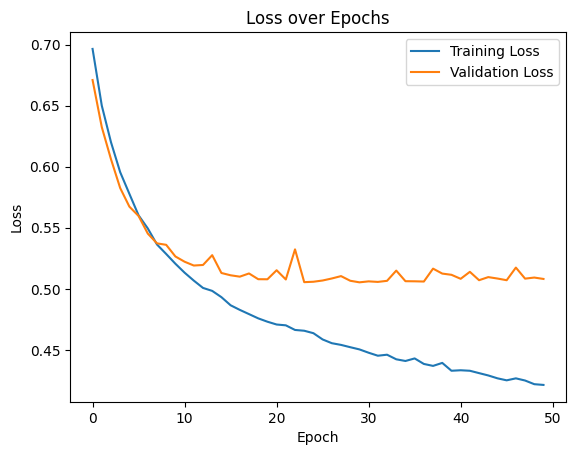

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = vgg_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(vgg_history.history['loss'], label='Training Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Modeli kaydetmek
vgg_model.save('/content/gdrive/My Drive/vgg_model_easy_hard_mix.h5')

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10 Epochlu Vgg Modelinin değerlendirmesi

19/19 [==============================] - 3s 141ms/step - loss: 0.4671 - accuracy: 0.7717
Test Loss: 0.4671454429626465
Test Accuracy: 0.7716666460037231
19/19 [==============================] - 3s 143ms/step


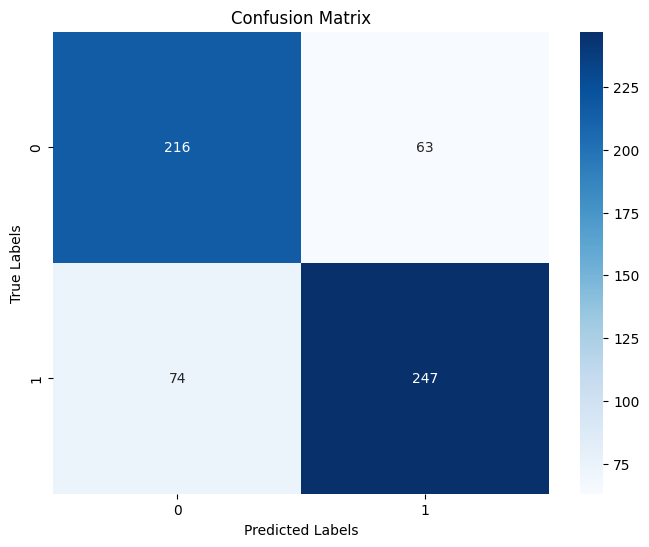

In [ ]:
saved_vgg = tf.keras.models.load_model('/content/gdrive/My Drive/vgg_model_easy_hard_mix.h5')

test_loss, test_accuracy = saved_vgg.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = saved_vgg.predict(X_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


